## Студентка: Елисеева Елизавета ИУ5-23М


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

from sklearn.preprocessing import OneHotEncoder

import sklearn

In [14]:
data = pd.read_csv("weatherHistory.csv")
%matplotlib inline

In [21]:
import random
def set_some_nan(df, index, column):
    if random.random() < 0.2:
        df.at[index, column] = np.NaN

data['hour'] = pd.DataFrame(data['Formatted Date'].apply(lambda x: pd.to_datetime(x).hour))
        
for i in range(data.shape[0]):
    set_some_nan(data, i, 'Temperature (C)')
    

data.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,hour
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,NaN,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,1
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,NaN,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,3
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,4
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.,5
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.,6
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,NaN,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.,7
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.,8
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.,9


In [22]:
data_features = list(zip(
# признаки
[i for i in data.columns],
zip(
    # типы колонок
    [str(i) for i in data.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('Formatted Date', ('object', 0)),
 ('Summary', ('object', 0)),
 ('Precip Type', ('object', 517)),
 ('Temperature (C)', ('float64', 34872)),
 ('Apparent Temperature (C)', ('float64', 0)),
 ('Humidity', ('float64', 0)),
 ('Wind Speed (km/h)', ('float64', 0)),
 ('Wind Bearing (degrees)', ('float64', 0)),
 ('Visibility (km)', ('float64', 0)),
 ('Loud Cover', ('float64', 0)),
 ('Pressure (millibars)', ('float64', 0)),
 ('Daily Summary', ('object', 0)),
 ('hour', ('int64', 0))]

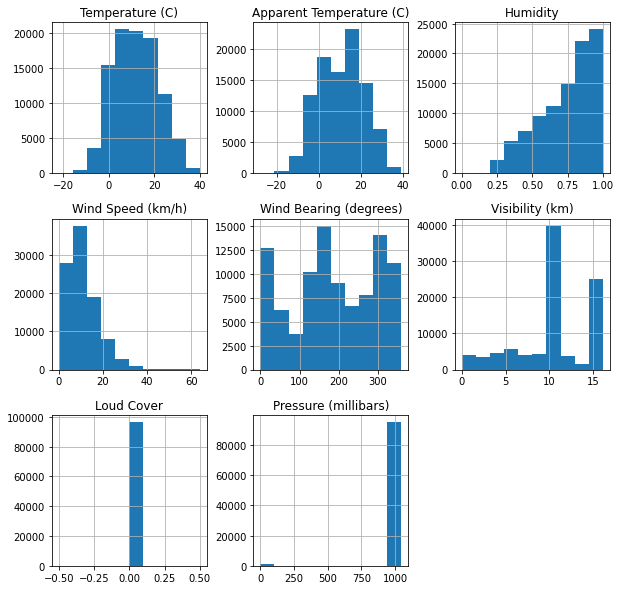

In [17]:
data.hist(figsize=(10,10));

# Устранение пропусков

<AxesSubplot:>

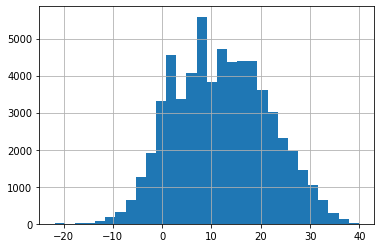

In [27]:
data['Temperature (C)'].hist(bins=30)
# Из диаграммы выше видно, что температура имеет почти нормальное распределение, что даст нам возможность заменить пропуски на средние значения.

In [29]:
def replace_nan_to_mean(df, index, column, mean):
#     if df.at[index, column] is np.NaN:
    if hash(data.at[index,column]) == 0 and data.at[index,column] != 0:
        df.at[index, column] = mean
        
mean = data['Temperature (C)'].mean()
for i in range(data.shape[0]):
    replace_nan_to_mean(data, i, 'Temperature (C)', mean)

In [30]:
data_features = list(zip(
# признаки
[i for i in data.columns],
zip(
    # типы колонок
    [str(i) for i in data.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('Formatted Date', ('object', 0)),
 ('Summary', ('object', 0)),
 ('Precip Type', ('object', 517)),
 ('Temperature (C)', ('float64', 0)),
 ('Apparent Temperature (C)', ('float64', 0)),
 ('Humidity', ('float64', 0)),
 ('Wind Speed (km/h)', ('float64', 0)),
 ('Wind Bearing (degrees)', ('float64', 0)),
 ('Visibility (km)', ('float64', 0)),
 ('Loud Cover', ('float64', 0)),
 ('Pressure (millibars)', ('float64', 0)),
 ('Daily Summary', ('object', 0)),
 ('hour', ('int64', 0))]

# Кодирование категориальных признаков

In [32]:
Summary = list(data['Summary'].unique())
Summary

['Partly Cloudy',
 'Mostly Cloudy',
 'Overcast',
 'Foggy',
 'Breezy and Mostly Cloudy',
 'Clear',
 'Breezy and Partly Cloudy',
 'Breezy and Overcast',
 'Humid and Mostly Cloudy',
 'Humid and Partly Cloudy',
 'Windy and Foggy',
 'Windy and Overcast',
 'Breezy and Foggy',
 'Windy and Partly Cloudy',
 'Breezy',
 'Dry and Partly Cloudy',
 'Windy and Mostly Cloudy',
 'Dangerously Windy and Partly Cloudy',
 'Dry',
 'Windy',
 'Humid and Overcast',
 'Light Rain',
 'Drizzle',
 'Windy and Dry',
 'Dry and Mostly Cloudy',
 'Breezy and Dry',
 'Rain']

In [33]:
for i in range(data.shape[0]):
    num = Summary.index(data.at[i, 'Summary'])
    data.at[i, 'Summary'] = num
#     print(num)

In [35]:
data['Summary'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26], dtype=object)

# Нормализация числовых признаков

In [36]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

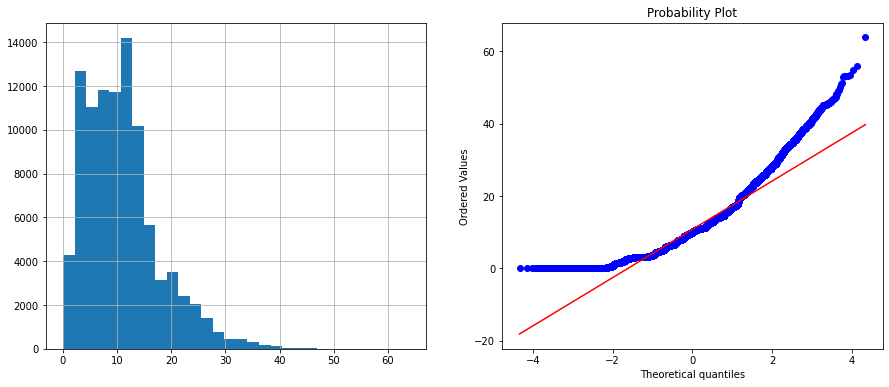

In [43]:
diagnostic_plots(data, 'Wind Speed (km/h)')

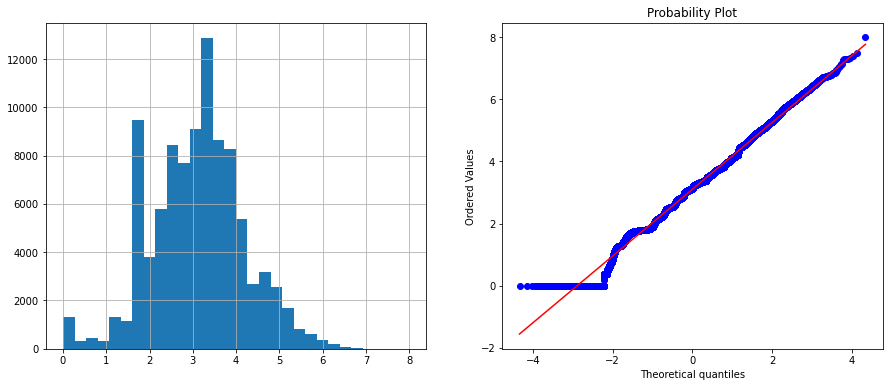

In [44]:
data['Wind_Speed_sqr'] = data['Wind Speed (km/h)']**(1/2) 
diagnostic_plots(data, 'Wind_Speed_sqr')